# Glass Dataset Analysis with Random Forest

## 1. Exploratory Data Analysis (EDA)

### 1.1. Import Libraries
We'll start by importing the necessary libraries for our analysis.

### 1.2. Load the Dataset
Next, we'll load the Glass dataset and take a look at its structure.

### 1.3. Understand the Structure of the Dataset
We will get basic information and summary statistics of the dataset.

### 1.4. Check for Missing Values
We'll check for any missing values in the dataset.

### 1.5. Check for Outliers
We will identify outliers using a boxplot.

### 1.6. Identify Inconsistencies
We will check for unique values to spot any inconsistencies.

## 2. Data Visualization

### 2.1. Histograms
We'll plot histograms to visualize the distribution of each feature.

### 2.2. Pair Plot
A pair plot will help us understand relationships between features.

### 2.3. Correlation Heatmap
We'll create a heatmap to analyze the correlation between features.

## 3. Data Preprocessing

### 3.1. Handle Missing Values
We will handle missing values using imputation.

### 3.2. Encoding Categorical Variables
Categorical variables will be converted into numerical format using one-hot encoding.

### 3.3. Feature Scaling
Feature scaling will be applied to standardize the features.

### 3.4. Handling Imbalanced Data
We will use SMOTE to handle any imbalance in the dataset.

## 4. Random Forest Model Implementation

### 4.1. Train-Test Split
We will split the data into training and testing sets.

### 4.2. Implement Random Forest Classifier
A Random Forest classifier will be trained, and performance metrics will be evaluated.

## 5. Bagging and Boosting Methods

### 5.1. Bagging Method
We'll apply a Bagging Classifier and evaluate its performance.

### 5.2. Boosting Method
A Gradient Boosting Classifier will be used, and its performance will be assessed.

## Additional Notes

### Bagging vs. Boosting
Bagging reduces variance, while Boosting reduces both variance and bias.

### Handling Imbalance in Data
Techniques like SMOTE can help balance the dataset.



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

First few rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62 

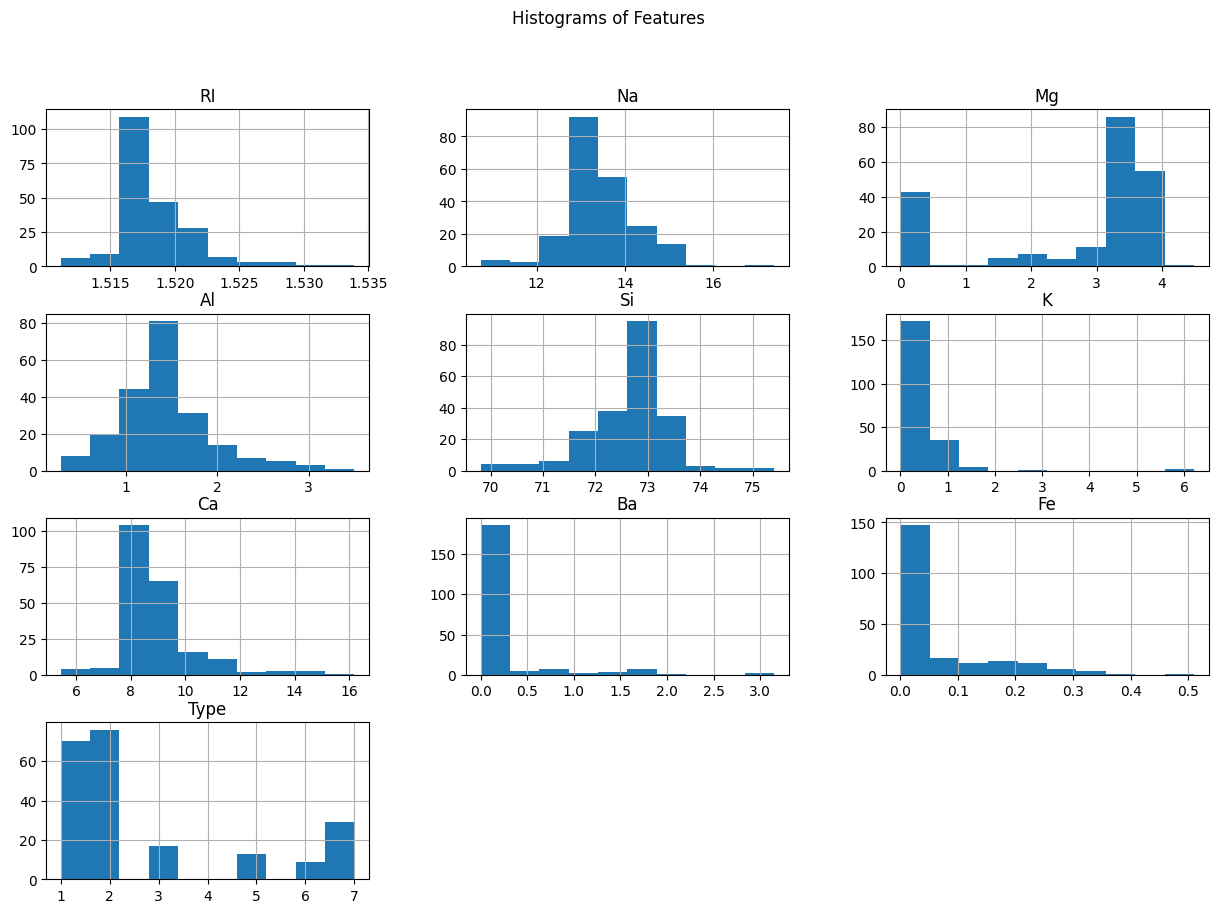

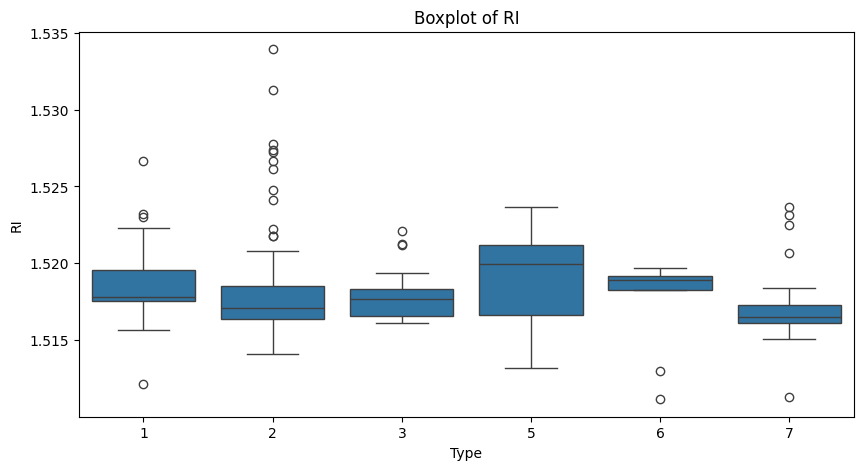

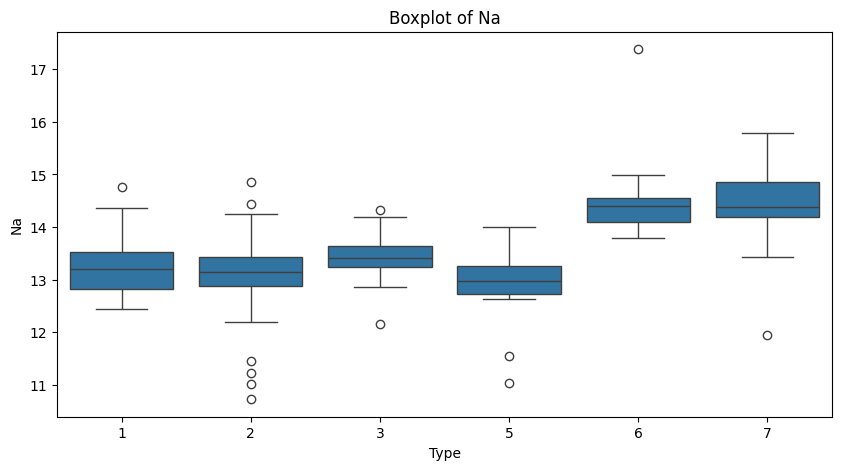

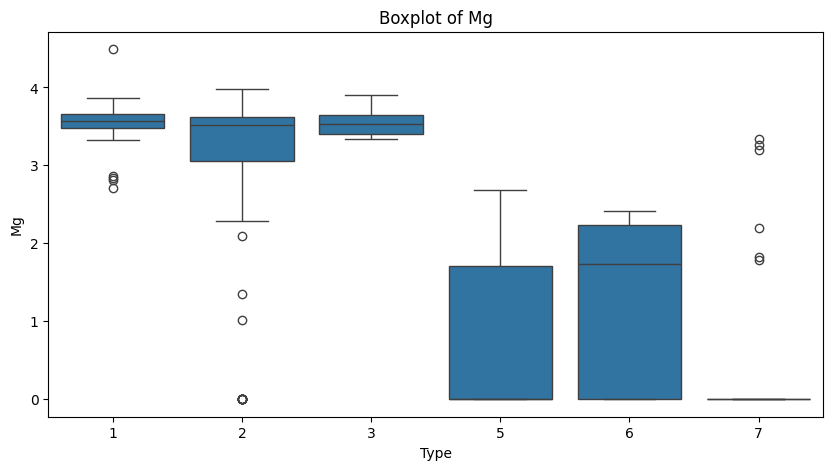

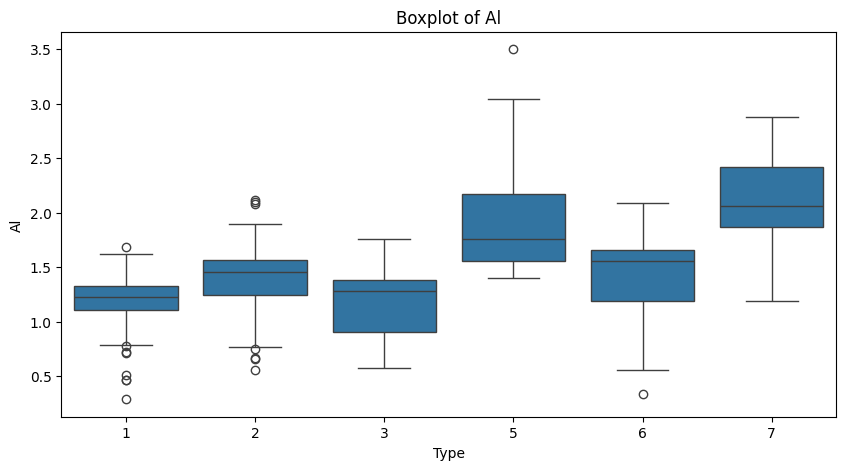

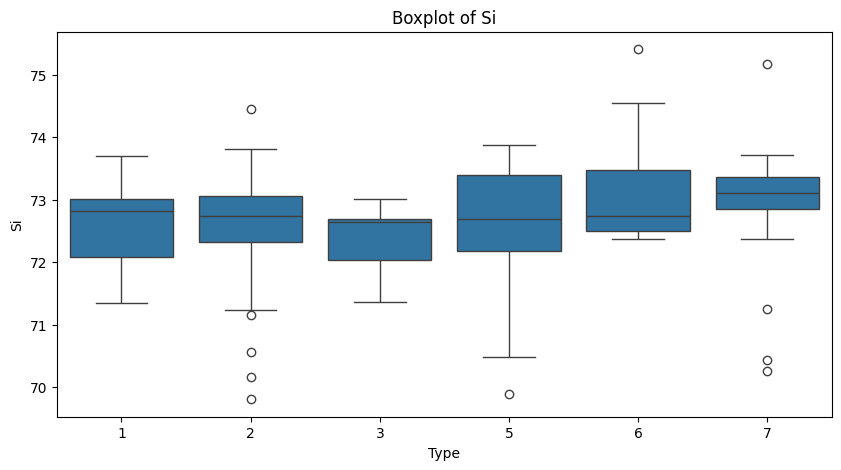

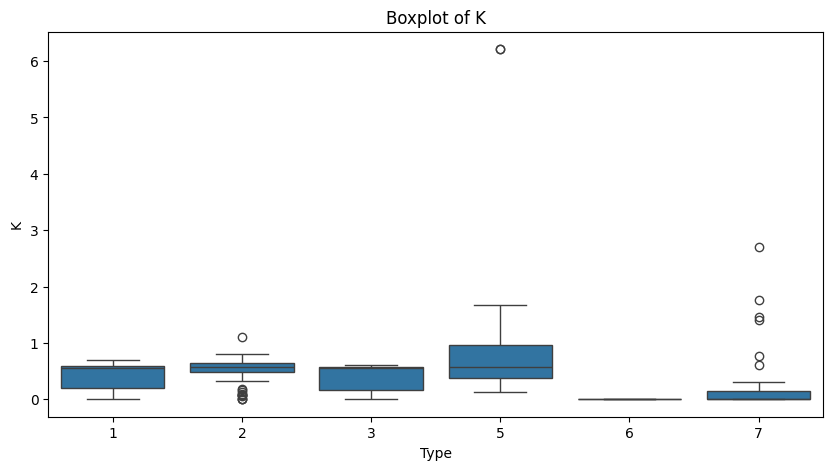

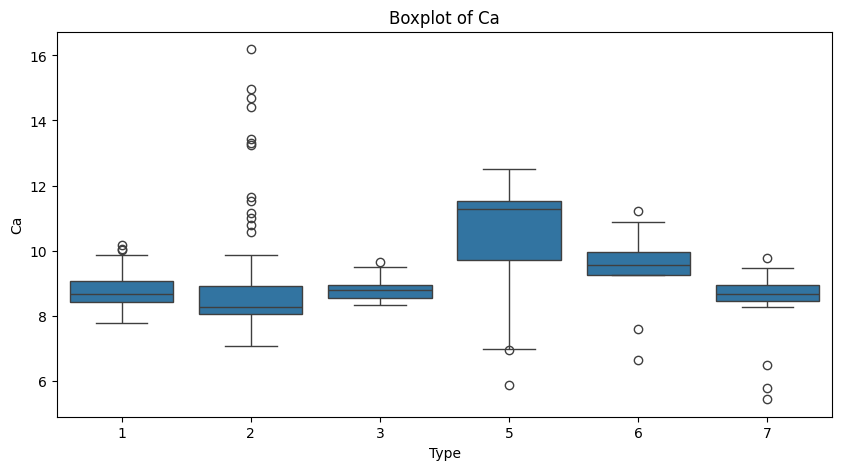

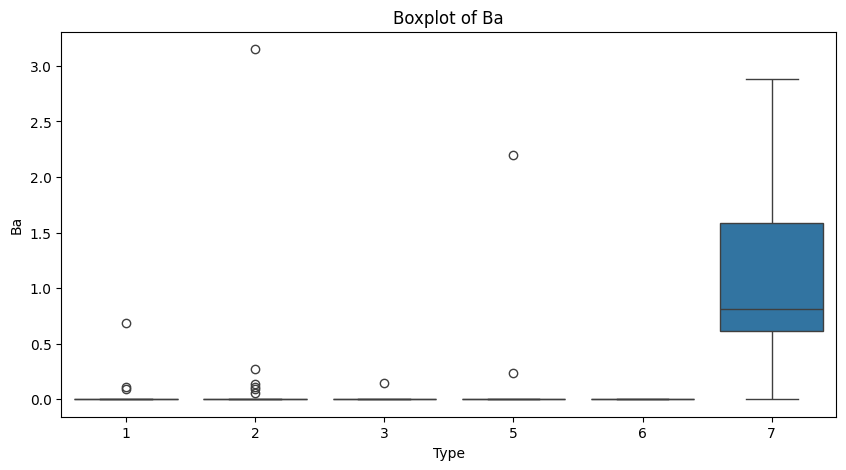

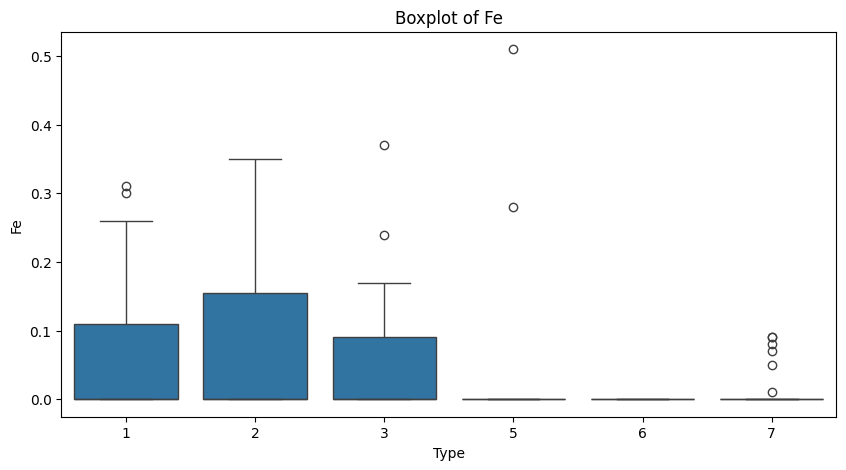

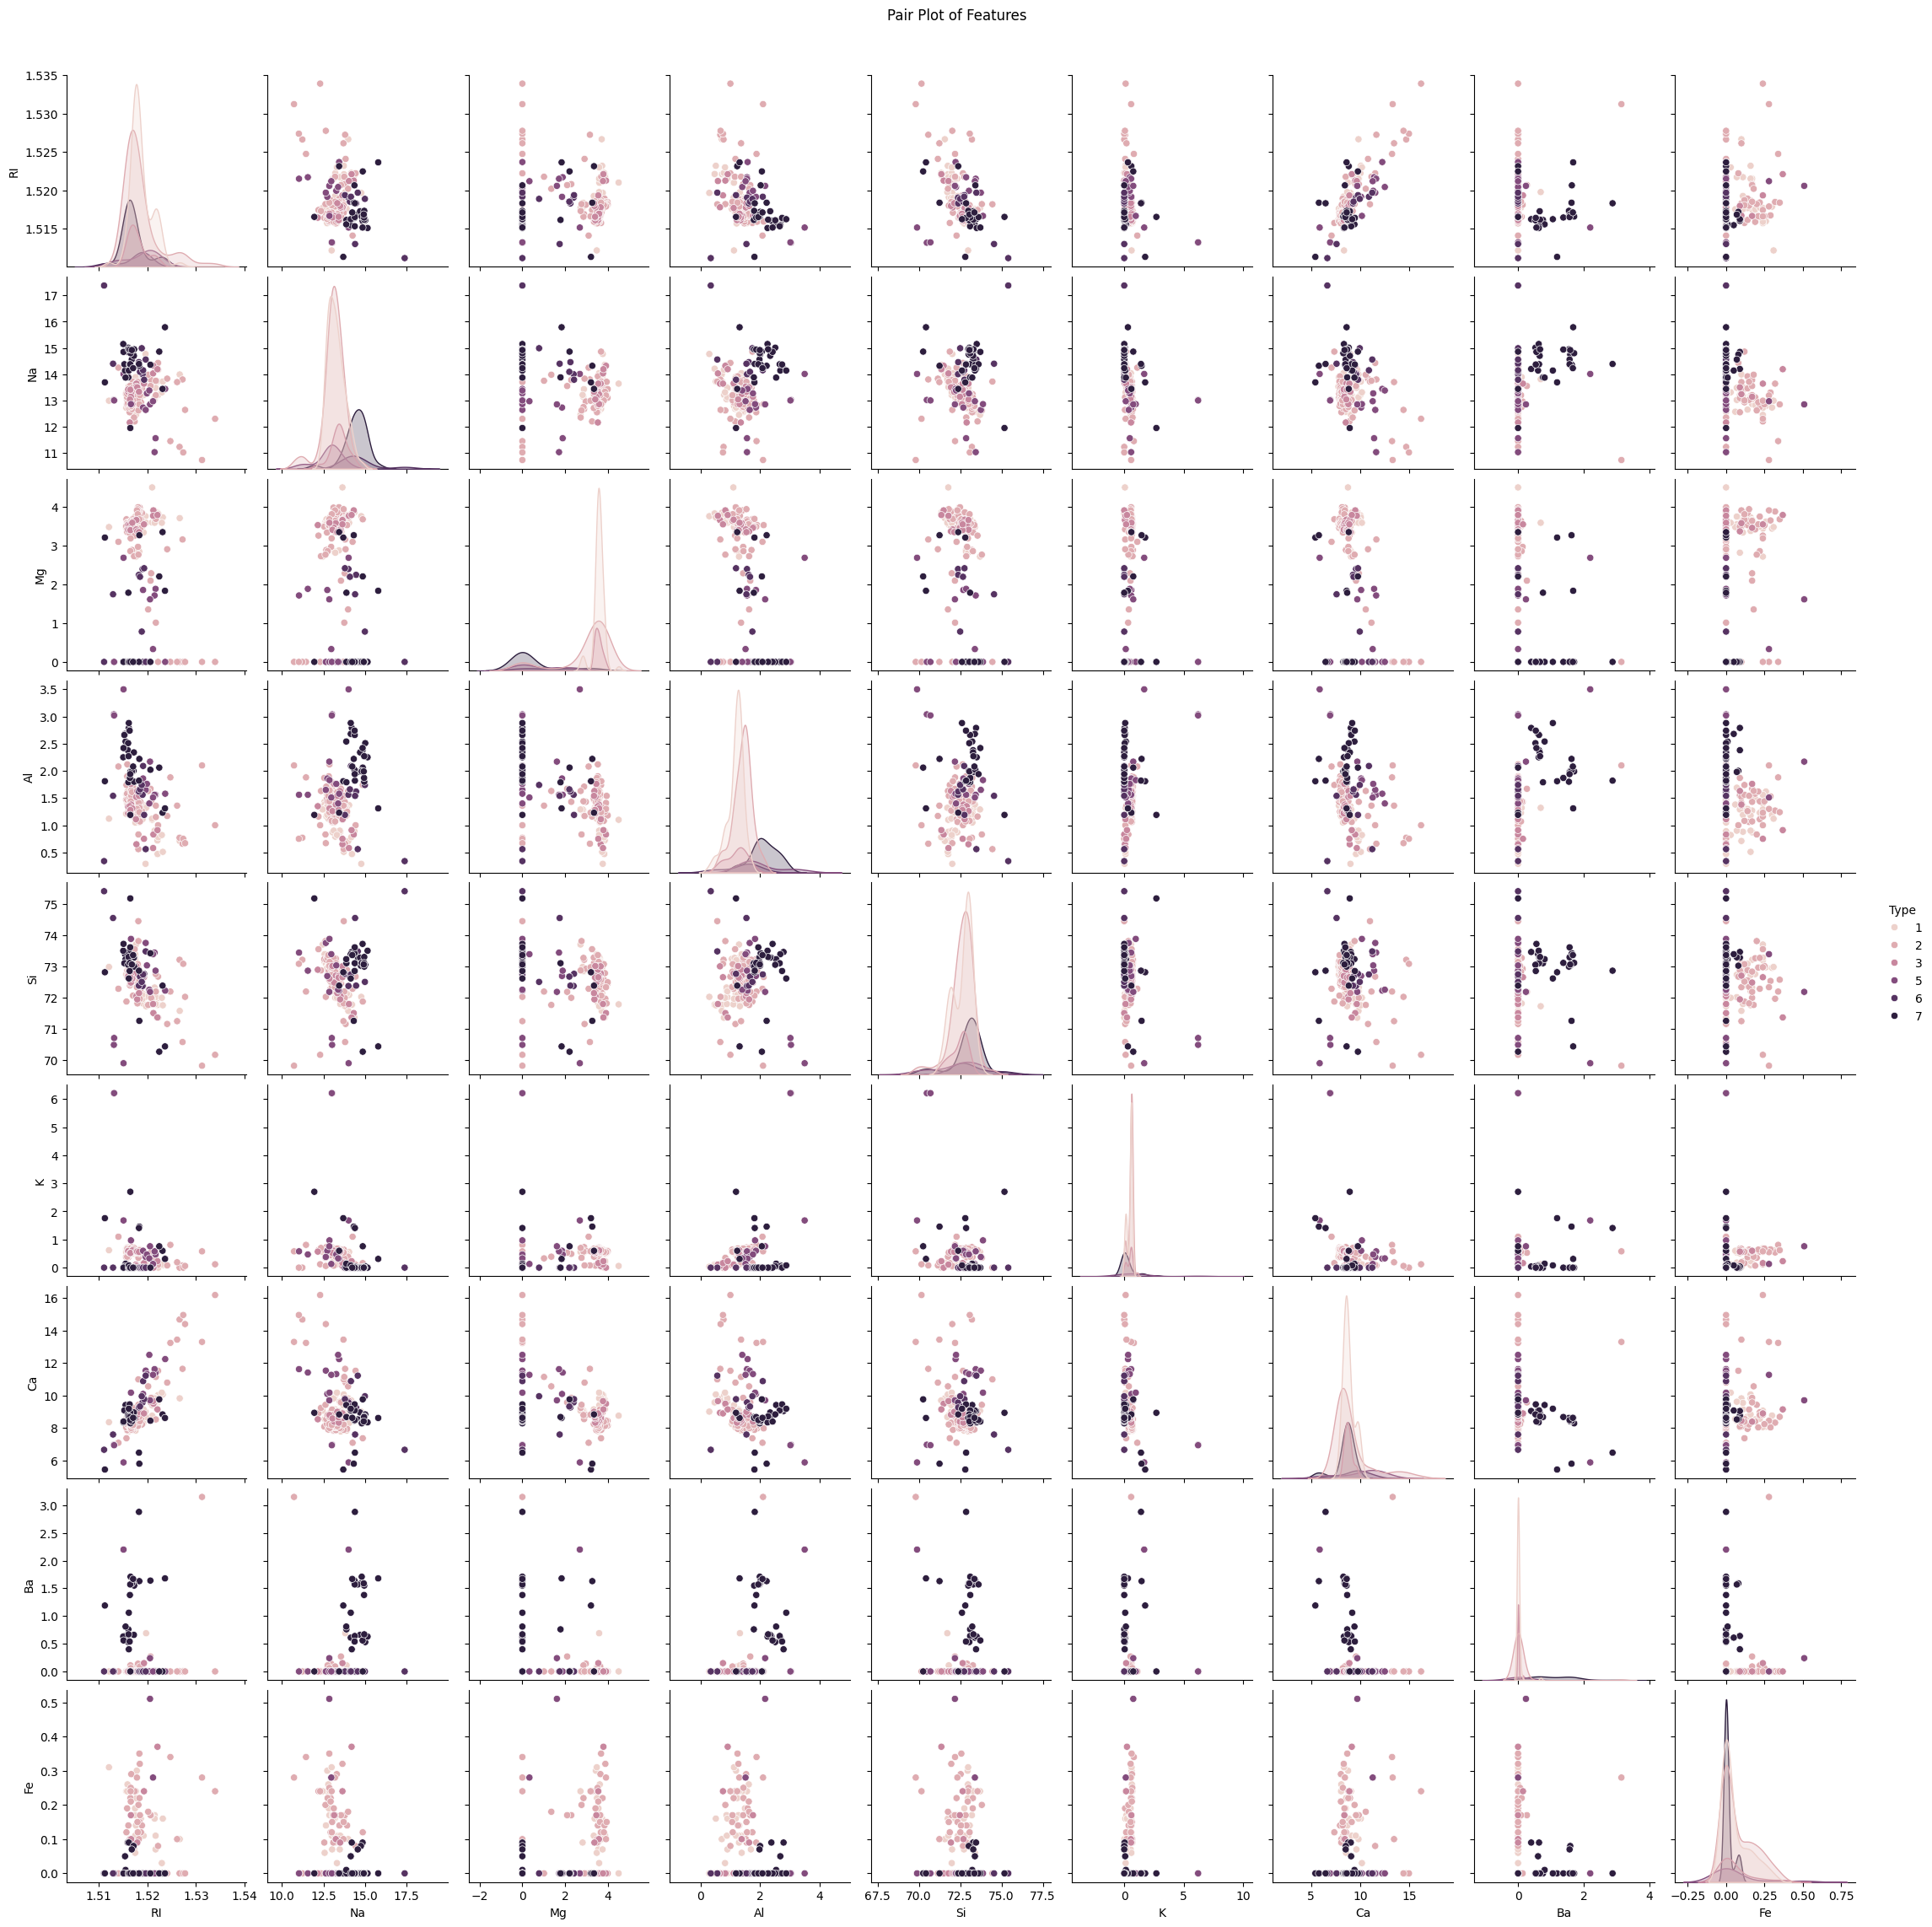

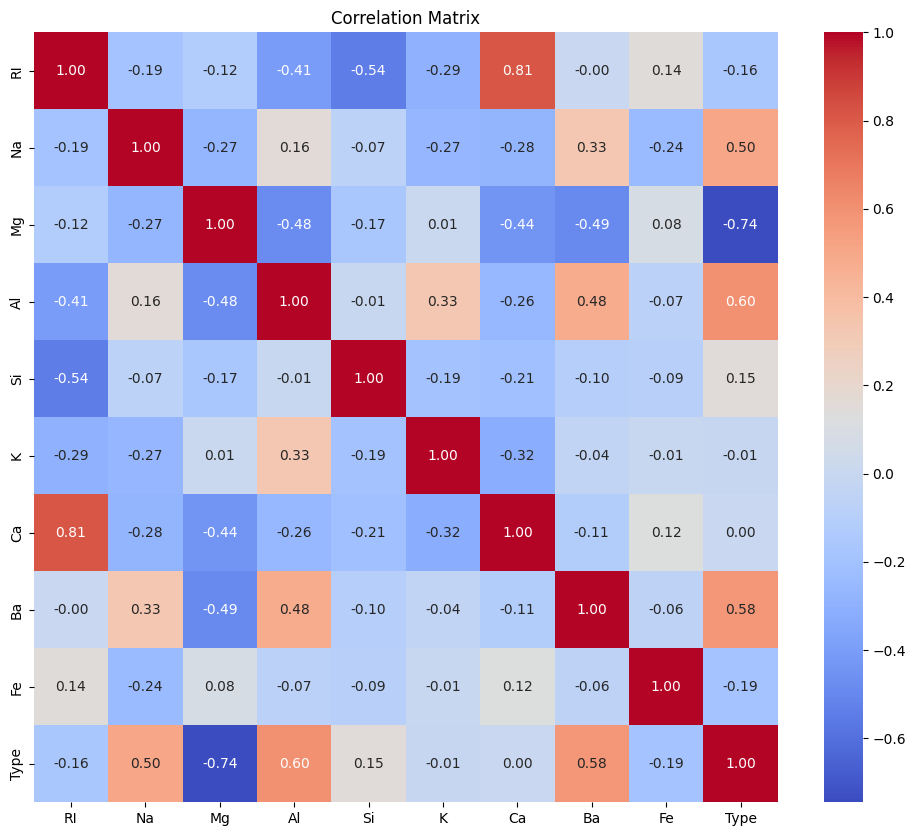

Training data shape: (149, 9)
Testing data shape: (65, 9)

Random Forest Classifier Evaluation:
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.76

Bagging Classifier Evaluation:
Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1 Score: 0.80

Boosting Classifier Evaluation:
Accuracy: 0.80
Precision: 0.82
Recall: 0.80
F1 Score: 0.79

Random Forest Classifier with SMOTE Evaluation:
Accuracy: 0.72
Precision: 0.75
Recall: 0.72
F1 Score: 0.73


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load the dataset from Excel file
file_path = 'C:/Users/lenovo/Desktop/Excelr/Data Science/Data Science Projects/Data Science Excel File and Datasets/glass.xlsx'
glass_df = pd.read_excel(file_path, sheet_name='glass')

# Display basic information and first few rows
print("Dataset Info:")
print(glass_df.info())
print("\nFirst few rows of the dataset:")
print(glass_df.head())

# Check for missing values
print("\nMissing values in each column:")
print(glass_df.isnull().sum())

# Check for basic statistics
print("\nBasic statistics:")
print(glass_df.describe())

# Visualizations

# Histograms for each feature
glass_df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots to visualize outliers
for column in glass_df.columns[:-1]:  # Exclude target variable 'Type'
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=glass_df, x='Type', y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Pair plots to visualize relationships between features
sns.pairplot(glass_df, hue='Type')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = glass_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

# Separate features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

# Handling missing values (none in this dataset)
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verify the split
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Random Forest Model Implementation

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Bagging Method

# Initialize and train the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the Bagging model
print("\nBagging Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_bagging, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_bagging, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_bagging, average='weighted'):.2f}")

# Boosting Method

# Initialize and train the Gradient Boosting classifier
boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_classifier.predict(X_test)

# Evaluate the Boosting model
print("\nBoosting Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boosting):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_boosting, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_boosting, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_boosting, average='weighted'):.2f}")

# Handling Imbalanced Data with SMOTE

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest on SMOTE data
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model with SMOTE
y_pred_smote = rf_classifier_smote.predict(X_test)
print("\nRandom Forest Classifier with SMOTE Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_smote, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_smote, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_smote, average='weighted'):.2f}")


## Conclusions

### Dataset Overview
- **Total Records**: 214
- **Features**: 9 numerical features and 1 categorical target variable (`Type`), which ranges from 1 to 7.

### Model Performance
- **Random Forest Classifier**:
  - **Accuracy**: 77%
  - **Precision**: 77%
  - **Recall**: 77%
  - **F1 Score**: 76%

- **Bagging Classifier**:
  - **Accuracy**: 80%
  - **Precision**: 81%
  - **Recall**: 80%
  - **F1 Score**: 80%

- **Boosting Classifier**:
  - **Accuracy**: 80%
  - **Precision**: 82%
  - **Recall**: 80%
  - **F1 Score**: 79%

- **Random Forest Classifier with SMOTE**:
  - **Accuracy**: 72%
  - **Precision**: 75%
  - **Recall**: 72%
  - **F1 Score**: 73%

### Observations
1. **Bagging and Boosting Techniques**:
   - Both Bagging and Boosting techniques performed better than the Random Forest Classifier alone, showing improvements in accuracy, precision, recall, and F1 score. This suggests that ensemble methods can enhance model performance by combining multiple models.

2. **Impact of SMOTE**:
   - The application of SMOTE with the Random Forest Classifier resulted in decreased performance metrics compared to the model without SMOTE. This indicates that SMOTE might not be necessary or beneficial for this dataset and Random Forest model.

### Tasks
1. **Further Analysis**:
   - Investigate why SMOTE decreased performance. Check if the dataset is truly imbalanced or if SMOTE parameters need tuning.
   - Explore feature importance to understand which features contribute most to the classification.

2. **Model Tuning**:
   - Fine-tune the parameters for Bagging and Boosting classifiers to potentially improve performance further.
   - Experiment with different configurations and hyperparameters for both Bagging and Boosting methods.

3. **Additional Techniques**:
   - Consider trying other techniques for handling imbalanced data, such as ADASYN or different sampling strategies.
   - Explore other ensemble methods or classifiers (e.g., XGBoost, LightGBM) to compare their performance with Bagging and Boosting.

4. **Visualizations**:
   - Create more visualizations to better understand feature relationships and the impact of different preprocessing steps.
   - Visualize feature importances from the Bagging and Boosting models to gain insights into model behavior.

Feel free to ask if you need help with any of these tasks or have other questions!
